### Problem Statement :: Breast Cancer Classification

### Import Library

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read dataset

In [5]:
data = pd.read_csv('C:/Dataset/Breast_cancer_data.csv')
data.sample(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
326,14.11,12.88,90.03,616.5,0.09309,1
496,12.65,18.17,82.69,485.6,0.10760,1
397,12.80,17.46,83.05,508.3,0.08044,1
362,12.76,18.84,81.87,496.6,0.09676,1
490,12.25,22.44,78.18,466.5,0.08192,1
334,12.30,19.02,77.88,464.4,0.08313,1
51,13.64,16.34,87.21,571.8,0.07685,1
340,14.42,16.54,94.15,641.2,0.09751,1
24,16.65,21.38,110.00,904.6,0.11210,0
454,12.62,17.15,80.62,492.9,0.08583,1


### View summary of dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


### Check the distribution of target variable

target variable is diagnosis

check the distribution of the target variable.

In [7]:
data['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

The target variable is diagnosis. It contains 2 values :: 0 and 1.

0 is for Negative prediction and 1 for Positive prediction.

We can see that the problem statement is binary classification task.

### Declare feature vector and target variable

In [10]:
X = data[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = data['diagnosis']

### Split dataset into training and test set

In [12]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()
# Fit scaler to training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    XGBClassifier()
]

# Create a dictionary to store the results
results = {}

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy: {accuracy}")
    
    # Classification report
    print(f"Classification Report for {clf_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("="*50)

RandomForestClassifier Accuracy: 0.9532163742690059
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Confusion Matrix for RandomForestClassifier:
[[ 59   4]
 [  4 104]]
AdaBoostClassifier Accuracy: 0.9122807017543859
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        63
           1       0.91      0.95      0.93       108

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171

Confusion Matrix for AdaBoostClassifier:
[[ 53  10]
 [  5 103]]
GradientBoostingCl

In [16]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    
    # Append results to DataFrame
    results_df = pd.concat([results_df,pd.DataFrame([{'Model': clf_name, 'Accuracy': accuracy, 'F1-Score': f1_score, 
                                    'Precision': precision, 'Recall': recall}])], ignore_index=True)

results_df

,Model,Accuracy,F1-Score,Precision,Recall
0,RandomForestClassifier,0.941520,0.941317,0.941391,0.941520
1,AdaBoostClassifier,0.912281,0.911461,0.912348,0.912281
2,GradientBoostingClassifier,0.941520,0.941704,0.942159,0.941520
3,LogisticRegression,0.923977,0.923848,0.923786,0.923977
4,SVC,0.923977,0.923848,0.923786,0.923977
5,KNeighborsClassifier,0.912281,0.912422,0.912629,0.912281
6,DecisionTreeClassifier,0.923977,0.923848,0.923786,0.923977
7,GaussianNB,0.923977,0.922934,0.925343,0.923977
8,XGBClassifier,0.941520,0.941317,0.941391,0.941520


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the RandomForestClassifier
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.9532163742690059
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Confusion Matrix for Random Forest Classifier:
[[ 58   5]
 [  3 105]]


### Check for Overfitting

In [19]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train_scaled, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_scaled, y_test)))

Training set score: 1.0000
Test set score: 0.9415


### Confusion Matrix

In [20]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 58   5]
 [  3 105]]

True Positives(TP) =  58

True Negatives(TN) =  105

False Positives(FP) =  5

False Negatives(FN) =  3


<Axes: >

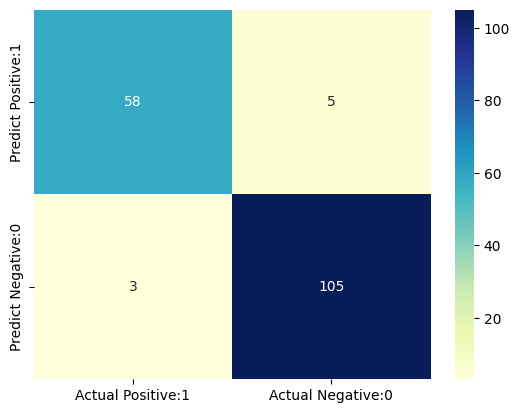

In [21]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### View Accuracy

In [23]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))

Random Forest Model accuracy score: 0.9532


### Classification Metrices

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [25]:
# test 1:
print("predcted class ",rf_classifier.predict(X_test_scaled[10].reshape(1,-1))[0])
print("actual class ", y_test.iloc[10])

predcted class  1
actual class  1


In [27]:
# test 2:
print("predcted class ",rf_classifier.predict(X_test_scaled[22].reshape(1,-1))[0])
print("actual class ", y_test.iloc[22])

predcted class  1
actual class  1


In [29]:
# test 3:
print("predcted class ",rf_classifier.predict(X_test_scaled[33].reshape(1,-1))[0])
print("actual class ", y_test.iloc[33])

predcted class  0
actual class  0


In [30]:
import numpy as np

def predict(mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness):
    
    
    # Prepare features array
    features = np.array([[mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness]])
    
    # scalling
    scaled_features = scaler.transform(features)
    
    # predict by model
    result = rf_classifier.predict(scaled_features)
    
    return result[0]

In [31]:
# test 1
mean_radius = 16.65
mean_texture = 21.38
mean_perimeter = 110.00
mean_area = 904.6
mean_smoothness = 0.11210

result = predict(mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness)

if result == 1:
    print("The Patient has Breast Cancer")
else: 
    print("The Patient has not Breast Cancer")

The Patient has not Breast Cancer


In [ ]:
# 16.65	21.38	110.00	904.6	0.11210	0

In [32]:
# test 2
mean_radius = 12.62
mean_texture = 17.15
mean_perimeter = 80.62
mean_area = 492.9
mean_smoothness = 0.08583

result = predict(mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness)

if result == 1:
    print("The Patient has Breast Cancer")
else: 
    print("The Patient has not Breast Cancer")

The Patient has Breast Cancer


In [ ]:
# 12.62	17.15	80.62	492.9	0.08583	1

In [33]:
import pickle
pickle.dump(rf_classifier,open("rf_classifier.pkl",'wb'))
pickle.dump(scaler,open("scaler.pkl",'wb'))